In [ ]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

# base url 
base_url = 'https://fantasy.premierleague.com/api/'
r = requests.get(base_url+'bootstrap-static/').json()

# print top level fields
pprint(r, indent=2, depth=1, compact=True)


{ 'chips': [...],
  'element_stats': [...],
  'element_types': [...],
  'elements': [...],
  'events': [...],
  'game_config': {...},
  'game_settings': {...},
  'phases': [...],
  'teams': [...],
  'total_players': 11416671}


In [43]:

players = r['elements']

#data for first player
pprint(players[0])


{'assists': 0,
 'birth_date': None,
 'bonus': 0,
 'bps': 0,
 'can_select': False,
 'can_transact': True,
 'chance_of_playing_next_round': 0,
 'chance_of_playing_this_round': 0,
 'clean_sheets': 0,
 'clean_sheets_per_90': 0,
 'code': 438098,
 'corners_and_indirect_freekicks_order': None,
 'corners_and_indirect_freekicks_text': '',
 'cost_change_event': 0,
 'cost_change_event_fall': 0,
 'cost_change_start': -1,
 'cost_change_start_fall': 1,
 'creativity': '0.0',
 'creativity_rank': 779,
 'creativity_rank_type': 335,
 'direct_freekicks_order': None,
 'direct_freekicks_text': '',
 'dreamteam_count': 0,
 'element_type': 3,
 'ep_next': '0.0',
 'ep_this': '0.0',
 'event_points': 0,
 'expected_assists': '0.00',
 'expected_assists_per_90': 0,
 'expected_goal_involvements': '0.00',
 'expected_goal_involvements_per_90': 0,
 'expected_goals': '0.00',
 'expected_goals_conceded': '0.00',
 'expected_goals_conceded_per_90': 0,
 'expected_goals_per_90': 0,
 'first_name': 'Fábio',
 'form': '0.0',
 'form

In [44]:
pd.set_option('display.max_columns', None)
# create players dataframe
players = pd.json_normalize(r['elements'])

# display information
players[['id', 'web_name', 'team', 'element_type']].head()

# create teams dataframe
teams = pd.json_normalize(r['teams'])
teams.head()

positions = pd.json_normalize(r['element_types'])
positions.head()

#combining data
df = pd.merge(
    left=players,
    right=teams,
    left_on='team',
    right_on='id'
)
df[['first_name', 'second_name', 'name']].head()

# join player positions
df = df.merge(
    positions,
    left_on='element_type',
    right_on='id'
)

# rename columns
df = df.rename(
    columns={'name':'team_name', 'singular_name':'position_name'}
)

# show result
df[
    ['first_name', 'second_name', 'team_name', 'position_name']
].head()

,first_name,second_name,team_name,position_name
0,Fábio,Ferreira Vieira,Arsenal,Midfielder
1,Gabriel,Fernando de Jesus,Arsenal,Forward
2,Gabriel,dos Santos Magalhães,Arsenal,Defender
3,Kai,Havertz,Arsenal,Forward
4,Karl,Hein,Arsenal,Goalkeeper


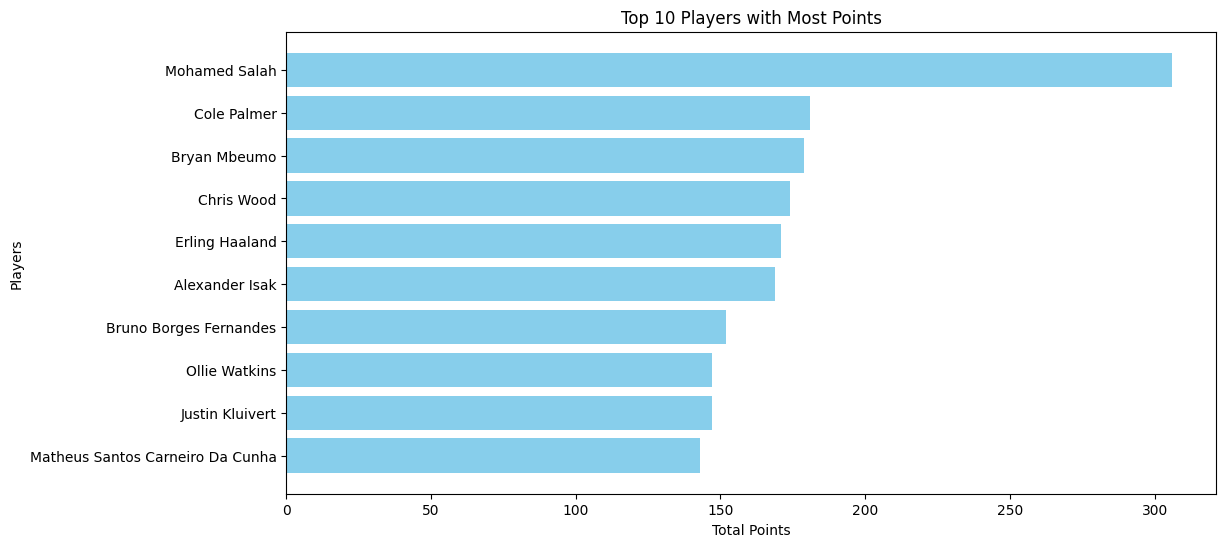

In [45]:
#Top 10 Players with Most Points
top_10_players = df.nlargest(10, 'total_points')[['first_name', 'second_name', 'total_points']]

plt.figure(figsize=(12, 6))
plt.barh(
    [f"{row['first_name']} {row['second_name']}" for _, row in top_10_players.iterrows()],
    top_10_players['total_points'],
    color='skyblue'
)
plt.xlabel('Total Points')
plt.ylabel('Players')
plt.title('Top 10 Players with Most Points')
plt.gca().invert_yaxis()
plt.show()


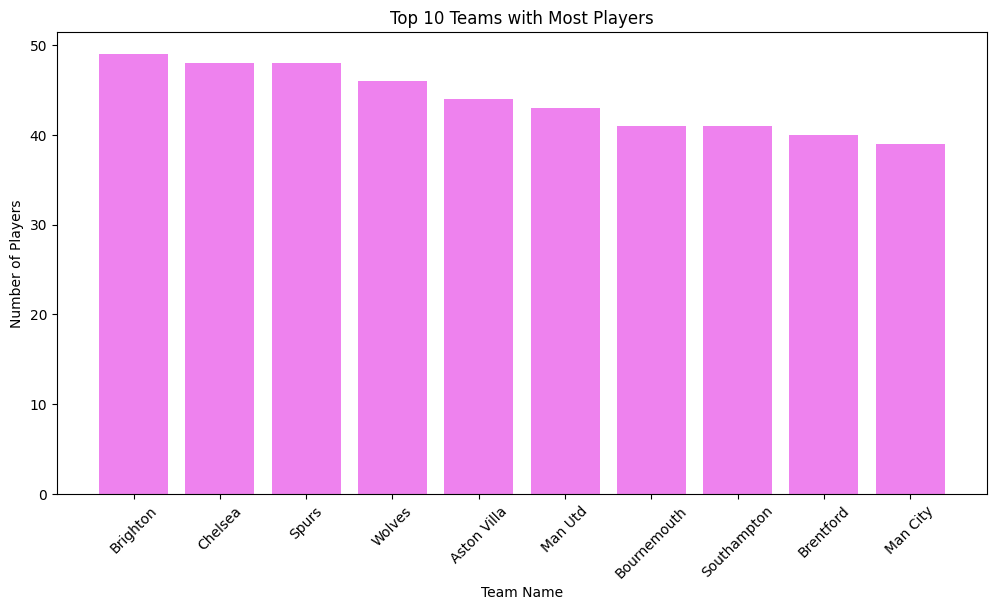

In [46]:
#Teams with Most Players
team_counts = df['team_name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
plt.bar(team_counts.index, team_counts.values, color='violet')
plt.title('Top 10 Teams with Most Players')
plt.xlabel('Team Name')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

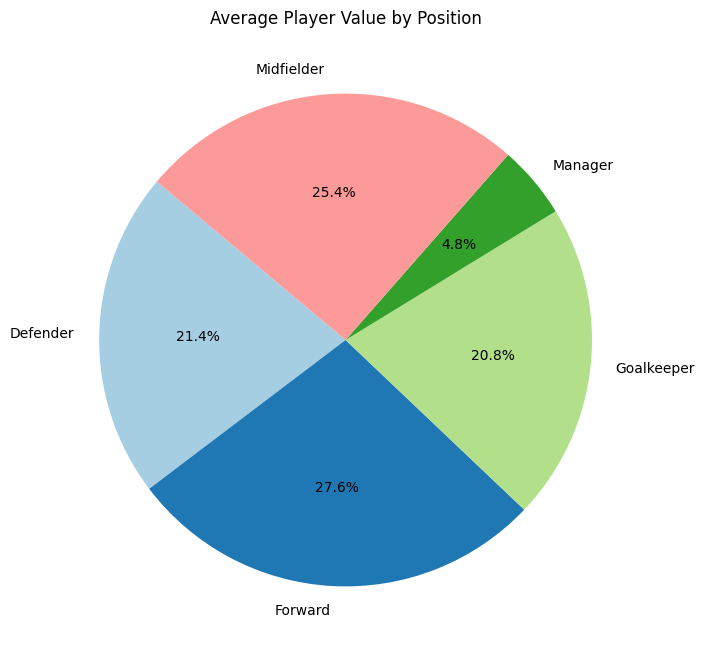

In [47]:
#Average Player Value
df['value'] = df['now_cost'] / 10
avg_value_by_position = df.groupby('position_name')['value'].mean()

plt.figure(figsize=(8, 8))
plt.pie(avg_value_by_position, labels=avg_value_by_position.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Average Player Value by Position')
plt.show()